In [3]:
from paraview import simple
import numpy as np
import os
import fnmatch
import matplotlib.pyplot as plt
from cycler import cycler
from scipy.interpolate import RegularGridInterpolator as rgi

In [75]:
time = '40000.vtk' 
path_name = '/media/warg/0125-7E1D/FinalModels/karato_water/'
lgnd = path_name[-5:-1]
os.chdir(path_name)
# os.system('rm -f *.csv') # remove all the csv files to save memory
# patterns = ['upper_crust_t0000*'+ time , 'lower_crust_t0000*'+ time  , 'mantle_t0000*'+ time]

# for filename in os.listdir('.'):
#   for p in patterns:
#       if fnmatch.fnmatch(filename,p):
#           reader = simple.OpenDataFile(filename)
#           filename_csv = filename.replace('.vtk' , '.csv')
#           name = path_name + filename_csv
#           to_points = simple.CellDatatoPointData(reader) # get cell values on points
#           writer = simple.CreateWriter(name, to_points)
#           writer.FieldAssociation = "Points"
#           writer.UpdatePipeline()
#          # get diff stress and points
#           os.system('''awk 'BEGIN { FS = "," }/[0-9]$/{print $22, $23, $24, $25}' ''' \
#             + filename_csv + ''' >> diff_stress''' + time [:-4] + '''.csv''')

In [76]:
file_ds = 'diff_stress' + time[:-4] + '.csv'
dat = np.loadtxt(file_ds)

dat_sort = np.ones((239686, 4))
dat_shap = np.reshape(dat, (3, 239686, 4 )) # get values for all points 
dat_sort[:,1: 4] = dat_shap[0, :, 1:4] # get points
dat_sort[:,0] = np.sum( dat_shap[:, :, 0], axis=0) # get values accurately
dat_sort[dat_sort[:,3] == -20000 ,0] = (dat_sort[dat_sort[:,3] == -20000, 0])/2.
dat_sort[dat_sort[:,3] == -40000 ,0] = (dat_sort[dat_sort[:,3] == -40000, 0])/2.

x = np.unique(dat_sort[:,1])
y = np.unique(dat_sort[:,2])
z = np.unique(dat_sort[:,3]) # get query points along which we want interpolation

In [77]:
xp = 945500 ; yp = 832500
#---------------------------------------------------------------
query = np.column_stack((z, yp*np.ones(len(z)), xp*np.ones(len(z))))

ind = np.lexsort((dat_sort[:,2], dat_sort[:,3])) # arrange data for meshgrid
data_yz = dat_sort[ind, :] # sort the data to make meshgrid

for i in range(79*37): # sort the x values
    indx = np.argsort(data_yz[0 + 82*i : 82 + 82*i, 1]) + 82*i
    data_yz[0 + 82*i : 82 + 82*i, 0:2] = data_yz[indx, 0:2]

diff_stress = np.reshape(data_yz[:,0], (37, 79, 82))
np.savetxt('data.txt', data_yz)

fn = rgi((np.sort(z) , np.sort(y) , np.sort(x)), diff_stress)
plot_over_line = (fn(query))

In [78]:
plt.figure(figsize=(8,6))
# figure = plt.plot(np.log10(np.abs(plot_over_line)), np.sort(z))
plt.rcParams.update({'font.size': 16})
plt.figure(1)
plt.plot(np.abs(plot_over_line), np.sort(z)/1e3, linewidth=2.0, label=lgnd)
plt.ylim([-200, 0])
plt.xscale('log')
plt.xlim([0.5e4, 5e8])
plt.rc('axes', prop_cycle=(cycler('color', ['y', 'g', 'red', 'blue', 'cyan', 'm', 'k' ])))
plt.hold(True)
plt.xlabel('Differential stress (Pa)', fontsize=18)
plt.ylabel('Depth (km)', fontsize=18)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., shadow=True, fontsize='small')

# plt.figure(2)
# plt.plot(np.abs(plot_over_line)/1e6, np.sort(z)/1e3, linewidth=2.0, label=lgnd)
# plt.ylim([-21, 0])
# plt.xlim([2.1e2, 3.1e2])
# plt.rc('axes', prop_cycle=(cycler('color', ['y', 'g', 'red', 'blue', 'cyan', 'm', 'k' ])))
# plt.hold(True)
# plt.xlabel('Differential stress (MPa)', fontsize=18)
# plt.ylabel('Depth (km)', fontsize=18)
# plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0., shadow=True, fontsize='small')

# figure2.hold(True)

#plt.savefig('plot_depth.png', bbox_inches='tight', pad_inches=0, dpi=400)

/home/warg/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  # Remove the CWD from sys.path while we load stuff.
/home/warg/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/home/warg/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


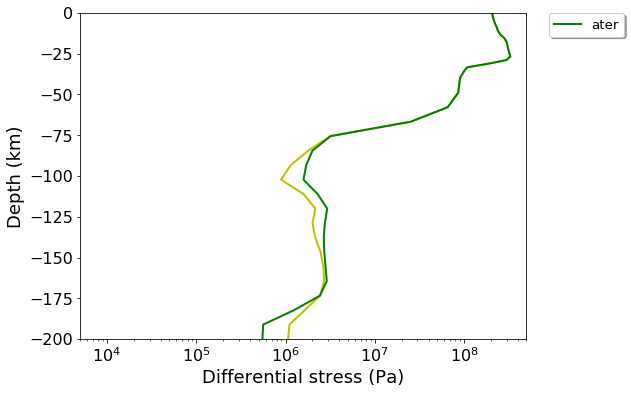

In [79]:
plt.show()
# plt.savefig('plot_uc.svg', bbox_inches='tight', pad_inches=0, dpi=400)

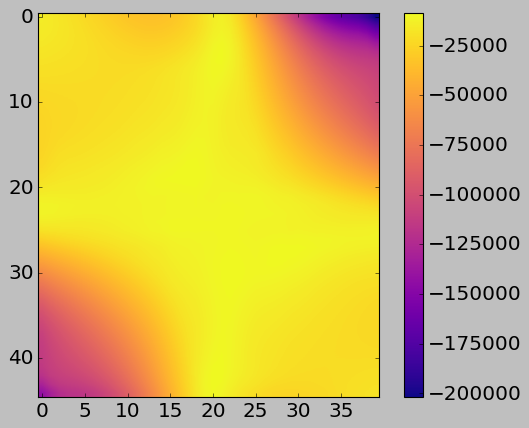

In [328]:
CB = plt.imshow(diff_stress[0,15:60,20:60], cmap='plasma')
plt.colorbar(CB)
plt.show()